<a href="https://colab.research.google.com/github/alwiyahya99/MachineLearning/blob/main/4_Membuat_dan_Melatih_Model_untuk_Memproses_Dataset_Gambar_dari_Dunia_Nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Klasifikasi Gambar : Membuat dan Melatih Model untuk Memproses Dataset Gambar dari Dunia Nyata**

In [28]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2024-01-19 07:15:43--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2024-01-19 07:15:43--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   199MB/s    in 

In [29]:
import os
import zipfile

In [30]:
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [31]:
os.listdir('/tmp/Chessman-image-dataset/Chess/')

['Knight', 'Pawn', 'King', 'Queen', 'Rook', 'Bishop']

In [32]:
print('total pawn image :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn/')))
print('total king image :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King/')))
print('total Knight image :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight/')))

total pawn image : 107
total king image : 76
total Knight image : 106


In [33]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.show(img)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1) #set validation split

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
) # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


## **MEMBUAT MODEL**

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),
    # Flatten the result to feed into a DNN
    Flatten(),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')
])

In [37]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])

In [40]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2)

Epoch 1/50
63/63 - 45s - loss: 1.8320 - accuracy: 0.1864 - val_loss: 1.7850 - val_accuracy: 0.1923 - 45s/epoch - 717ms/step
Epoch 2/50
63/63 - 42s - loss: 1.7869 - accuracy: 0.1904 - val_loss: 1.7755 - val_accuracy: 0.1923 - 42s/epoch - 672ms/step
Epoch 3/50
63/63 - 44s - loss: 1.7822 - accuracy: 0.2265 - val_loss: 1.7775 - val_accuracy: 0.1731 - 44s/epoch - 704ms/step
Epoch 4/50
63/63 - 42s - loss: 1.7694 - accuracy: 0.2084 - val_loss: 1.8102 - val_accuracy: 0.1154 - 42s/epoch - 669ms/step
Epoch 5/50
63/63 - 42s - loss: 1.7511 - accuracy: 0.2244 - val_loss: 1.7635 - val_accuracy: 0.2500 - 42s/epoch - 671ms/step
Epoch 6/50
63/63 - 42s - loss: 1.6978 - accuracy: 0.2946 - val_loss: 1.6776 - val_accuracy: 0.2115 - 42s/epoch - 672ms/step
Epoch 7/50
63/63 - 42s - loss: 1.6777 - accuracy: 0.2786 - val_loss: 1.6215 - val_accuracy: 0.2692 - 42s/epoch - 672ms/step
Epoch 8/50
63/63 - 45s - loss: 1.6073 - accuracy: 0.3126 - val_loss: 1.6444 - val_accuracy: 0.3269 - 45s/epoch - 711ms/step
Epoch 9/

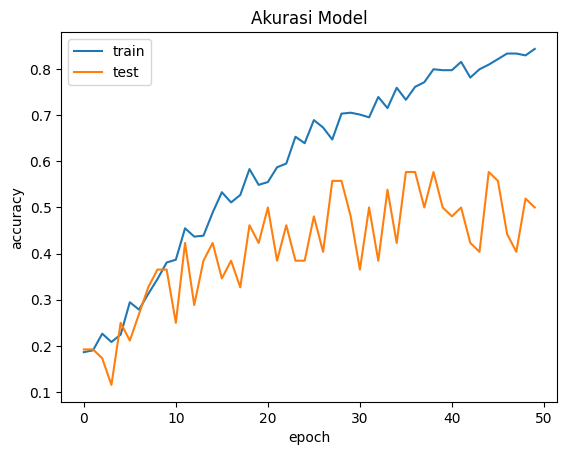

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

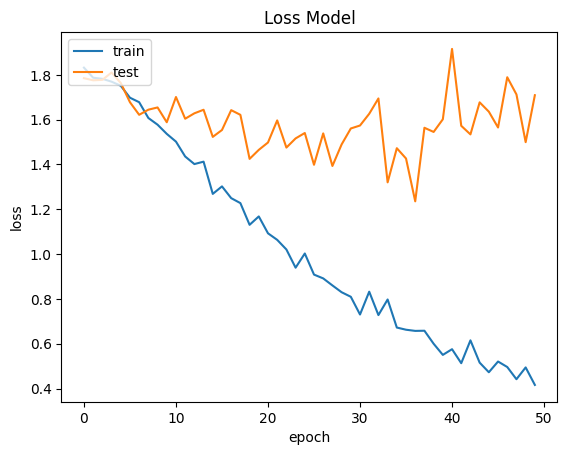

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()